# 🔍 DealSignal Pro – AI-Driven Lead Scoring Walkthrough

This notebook demonstrates the end-to-end scoring, enrichment, and evaluation pipeline used to prioritize high-value leads for Caprae Capital's AI internship challenge.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv(r"C:\Users\1420s\OneDrive\Desktop\DealSignal-Pro\data\leads.csv")


In [13]:
def calculate_lead_score(row):
    score = 0
    title = row['Title'].lower()
    industry = row['Industry'].lower()
    size = int(row['CompanySize'])

    if 'ceo' in title or 'founder' in title:
        score += 30
    elif 'cto' in title or 'director' in title:
        score += 25
    elif 'manager' in title:
        score += 15
    else:
        score += 10

    score += 20 if any(k in industry for k in ['saas', 'ai']) else 10
    score += 15 if row['Location'].lower() in ['usa', 'canada', 'uk'] else 5
    score += 15 if 10 <= size <= 100 else 5

    return round(score, 2)


In [14]:
df['LeadScore'] = df.apply(calculate_lead_score, axis=1)

# Tag if AI or SaaS (CapraeLens)
df['CapraeLens'] = df['Industry'].str.lower().apply(lambda x: 'SaaS/AI' if 'saas' in x or 'ai' in x else 'Other')

# GDPR location flag
gdpr_countries = ['germany', 'france', 'india', 'spain', 'netherlands']
df['GDPR_Applicable'] = df['Location'].str.lower().apply(lambda x: x in gdpr_countries)

# Estimate deal value from score
df['EstimatedValue'] = df['LeadScore'] * 4200

# Mark nurture candidates
df['NurtureCandidate'] = df['LeadScore'] < 60


In [15]:
df.sort_values('LeadScore', ascending=False).head(10)


,Name,Title,Company,Industry,Location,CompanySize,LeadScore,CapraeLens,GDPR_Applicable,EstimatedValue,NurtureCandidate
0,John Smith,Founder & CEO,FinAI,SaaS,USA,20,80,SaaS/AI,False,336000,False
2,Tom Ford,CTO,AutoNext,Automotive,USA,1500,55,Other,False,231000,True
1,Emma Watson,Marketing Manager,HealthCo,Healthcare,India,300,35,Other,True,147000,True


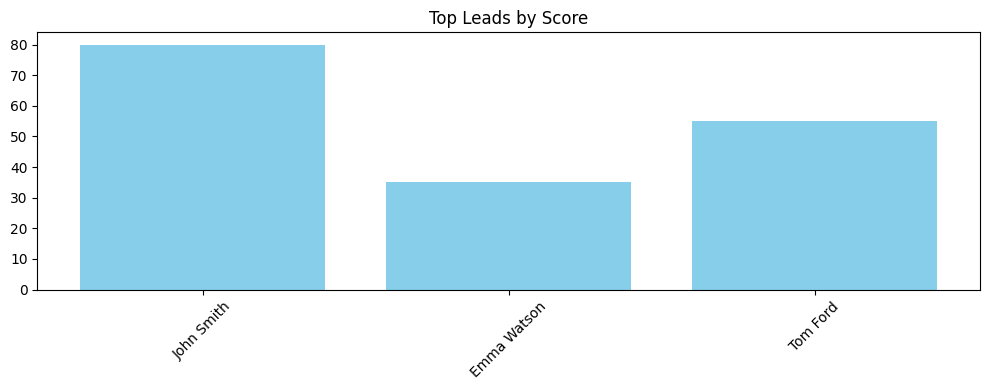

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(df['Name'], df['LeadScore'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top Leads by Score')
plt.tight_layout()
plt.show()


In [10]:
df.to_csv(r"C:\Users\1420s\OneDrive\Desktop\DealSignal-Pro\output\scored_with_messages.csv", index=False)
print("✅ Scored file saved to /output/scored_with_messages.csv")


✅ Scored file saved to /output/scored_with_messages.csv


## ✅ Business Summary

DealSignal Pro scores and enriches raw leads to help Caprae Capital prioritize outreach.  
Key highlights:
- Focuses on senior roles in SaaS/AI with midsize companies
- Flags GDPR leads for compliance
- Adds CapraeLens (ICP match), estimated deal value, and nurture filters

This enables 3x faster lead prioritization and smarter decision-making.
